## 1. Import The Data

In [4]:
from google.colab import files
import io
import pandas as pd

# Upload file
uploaded = files.upload()

Saving Insulin_Dataset.csv to Insulin_Dataset.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['Insulin_Dataset.csv']))

Check Data

In [6]:
# Check Shape And First 5 Rows
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (700, 28)


,patient_id,date,time,glucose_level,target_glucose,carbs_g,protein_g,fat_g,fiber_g,meal_type,...,insulin_to_carb_ratio,correction_factor,circadian_sensitivity_factor,stress_level,activity_level,sleep_hours,recommended_bolus_units,age,weight_kg,genetic_risk
0,3,2025-01-09,21:08:00,202.5,100.0,0.0,18.0,6.0,9.0,dinner,...,10.0,60.0,0.91,high,heavy,9.0,1.7,21,34.3,1
1,1,2025-01-01,13:53:00,214.4,100.0,35.0,15.0,9.0,7.0,lunch,...,15.0,40.0,0.77,low,heavy,8.0,5.2,14,76.5,1
2,1,2025-01-01,20:19:00,238.9,100.0,0.0,1.0,12.0,5.0,lunch,...,12.0,50.0,1.03,low,heavy,8.0,2.8,51,36.0,0
3,3,2025-01-07,20:22:00,190.9,100.0,0.0,4.0,17.0,4.0,snack,...,12.0,50.0,0.75,medium,heavy,7.0,1.8,59,61.8,0
4,1,2025-01-14,13:59:00,168.8,100.0,0.0,16.0,0.0,1.0,lunch,...,10.0,60.0,1.21,medium,none,6.0,1.1,23,80.0,2


Understand The Data

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    700 non-null    int64  
 1   date                          700 non-null    object 
 2   time                          700 non-null    object 
 3   glucose_level                 695 non-null    float64
 4   target_glucose                696 non-null    float64
 5   carbs_g                       695 non-null    float64
 6   protein_g                     693 non-null    float64
 7   fat_g                         696 non-null    float64
 8   fiber_g                       698 non-null    float64
 9   meal_type                     699 non-null    object 
 10  glycemic_index                693 non-null    float64
 11  bolus_dose_units              695 non-null    float64
 12  bolus_type                    696 non-null    object 
 13  basal

In [8]:
# Missing Values Check
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
patient_id                      0
date                            0
time                            0
glucose_level                   5
target_glucose                  4
carbs_g                         5
protein_g                       7
fat_g                           4
fiber_g                         2
meal_type                       1
glycemic_index                  7
bolus_dose_units                5
bolus_type                      4
basal_rate                      5
insulin_on_board                2
duration_of_insulin_action      7
time_since_last_bolus           2
dynamic_IOB                     3
insulin_to_carb_ratio           6
correction_factor               4
circadian_sensitivity_factor    5
stress_level                    4
activity_level                  6
sleep_hours                     7
recommended_bolus_units         4
age                             0
weight_kg                       0
genetic_risk                    0
dtype: int64


In [9]:
# Numerical Summary Statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,patient_id,glucose_level,target_glucose,carbs_g,protein_g,fat_g,fiber_g,glycemic_index,bolus_dose_units,basal_rate,...,time_since_last_bolus,dynamic_IOB,insulin_to_carb_ratio,correction_factor,circadian_sensitivity_factor,sleep_hours,recommended_bolus_units,age,weight_kg,genetic_risk
count,700.000000,695.000000,696.0,695.000000,693.000000,696.000000,698.000000,693.000000,695.000000,695.000000,...,698.000000,697.000000,694.000000,696.000000,695.000000,693.000000,696.000000,700.000000,700.000000,700.000000
mean,1.994286,161.299281,100.0,27.428777,15.431457,10.120690,4.848138,64.819625,3.567914,0.854561,...,177.924069,1.648379,12.335735,49.597701,1.002216,6.658009,3.576580,40.160000,65.123143,0.528571
std,0.812965,50.703146,0.0,33.230143,8.841082,6.077185,3.183508,14.898329,2.959310,0.202948,...,103.697711,2.023171,2.084359,8.213636,0.172577,1.695773,3.043849,17.085415,20.778515,0.689621
min,1.000000,70.100000,100.0,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.500000,...,0.000000,0.000000,10.000000,40.000000,0.700000,4.000000,-0.000000,10.000000,30.100000,0.000000
25%,1.000000,118.350000,100.0,0.000000,8.000000,5.000000,2.000000,52.000000,1.100000,0.670000,...,92.000000,0.160000,10.000000,40.000000,0.850000,5.000000,1.200000,25.000000,47.375000,0.000000
50%,2.000000,162.100000,100.0,0.000000,16.000000,10.000000,5.000000,65.000000,2.700000,0.860000,...,174.000000,0.850000,12.000000,50.000000,1.010000,7.000000,2.600000,41.500000,64.650000,0.000000
75%,3.000000,206.450000,100.0,56.500000,23.000000,15.000000,8.000000,78.000000,5.900000,1.030000,...,264.750000,2.330000,15.000000,60.000000,1.150000,8.000000,5.500000,54.000000,83.675000,1.000000
max,3.000000,249.800000,100.0,100.000000,30.000000,20.000000,10.000000,90.000000,11.300000,1.200000,...,360.000000,10.110000,15.000000,60.000000,1.300000,9.000000,12.600000,69.000000,99.900000,2.000000


In [10]:
# Unique Value In Categorical Coloumn
print("\nUnique values in categorical columns:")
for col in ["meal_type", "bolus_type", "stress_level", "activity_level", "genetic_risk"]:
    print(f"{col}: {df[col].unique()}")



Unique values in categorical columns:
meal_type: ['dinner' 'lunch' 'snack' 'breakfast' nan]
bolus_type: ['square' 'dual-wave' 'normal' nan]
stress_level: ['high' 'low' 'medium' nan]
activity_level: ['heavy' 'none' 'light' 'moderate' nan]
genetic_risk: [1 0 2]


 ## 2. Cleaning The Data

In [11]:
# Missing values check again
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 patient_id                      0
date                            0
time                            0
glucose_level                   5
target_glucose                  4
carbs_g                         5
protein_g                       7
fat_g                           4
fiber_g                         2
meal_type                       1
glycemic_index                  7
bolus_dose_units                5
bolus_type                      4
basal_rate                      5
insulin_on_board                2
duration_of_insulin_action      7
time_since_last_bolus           2
dynamic_IOB                     3
insulin_to_carb_ratio           6
correction_factor               4
circadian_sensitivity_factor    5
stress_level                    4
activity_level                  6
sleep_hours                     7
recommended_bolus_units         4
age                             0
weight_kg                       0
genetic_risk                    0
dtype: int64


In [12]:
# 1. Clean Missing Value In Numerical columns (mean/median se)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1618714734.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [13]:
# 2. Clean Missing Value In Categorical columns (mode se)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-614862806.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
# Verify cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 patient_id                      0
date                            0
time                            0
glucose_level                   0
target_glucose                  0
carbs_g                         0
protein_g                       0
fat_g                           0
fiber_g                         0
meal_type                       0
glycemic_index                  0
bolus_dose_units                0
bolus_type                      0
basal_rate                      0
insulin_on_board                0
duration_of_insulin_action      0
time_since_last_bolus           0
dynamic_IOB                     0
insulin_to_carb_ratio           0
correction_factor               0
circadian_sensitivity_factor    0
stress_level                    0
activity_level                  0
sleep_hours                     0
recommended_bolus_units         0
age                             0
weight_kg                       0
genetic_risk                    0
dtype: int64


In [15]:
# Save cleaned dataset
df.to_csv("insulin_predictor_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'insulin_predictor_cleaned.csv'")


✅ Cleaned dataset saved as 'insulin_predictor_cleaned.csv'


## 3. Exploratory Data Analysis (EDA)

1. Data Distribution

Histograms of all numeric features help us understand how values are spread.

Example: glucose_level distribution shows if most readings are between 100–180 mg/dL or skewed above 200.

age and weight_kg distributions give insights into the patient population profile.

2. Correlation Heatmap

The heatmap highlights linear relationships between numeric variables.

Example: carbs_g and bolus_dose_units should show a positive correlation (more carbs → higher insulin dose).

glucose_level and recommended_bolus_units will also show correlation.

3. Meal Analysis

Barplot (Total Carbs by Meal Type): Which meal (breakfast/lunch/dinner/snack) contributes the most carbs.

Scatterplot (Glucose vs Insulin by Meal Type): How insulin needs vary by meal.

Different colors for each meal make patterns easy to spot.

4. Stress & Lifestyle Impact

Boxplot (Stress vs Recommended Bolus): Shows how stress affects insulin dosage (higher stress often → higher dose).

Pie Chart (Activity Levels): Distribution of patient activity levels (none/light/moderate/heavy).

5. Key Numerical Relationships

Scatterplots:

glucose_level vs bolus_dose_units → Insulin response to blood glucose.

carbs_g vs recommended_bolus_units → Direct effect of carb intake on insulin dosage.

Histograms with KDE: Smooth distribution curves for important features (glucose, carbs, insulin doses, age, weight).

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Notebook Style
sns.set(style="whitegrid")

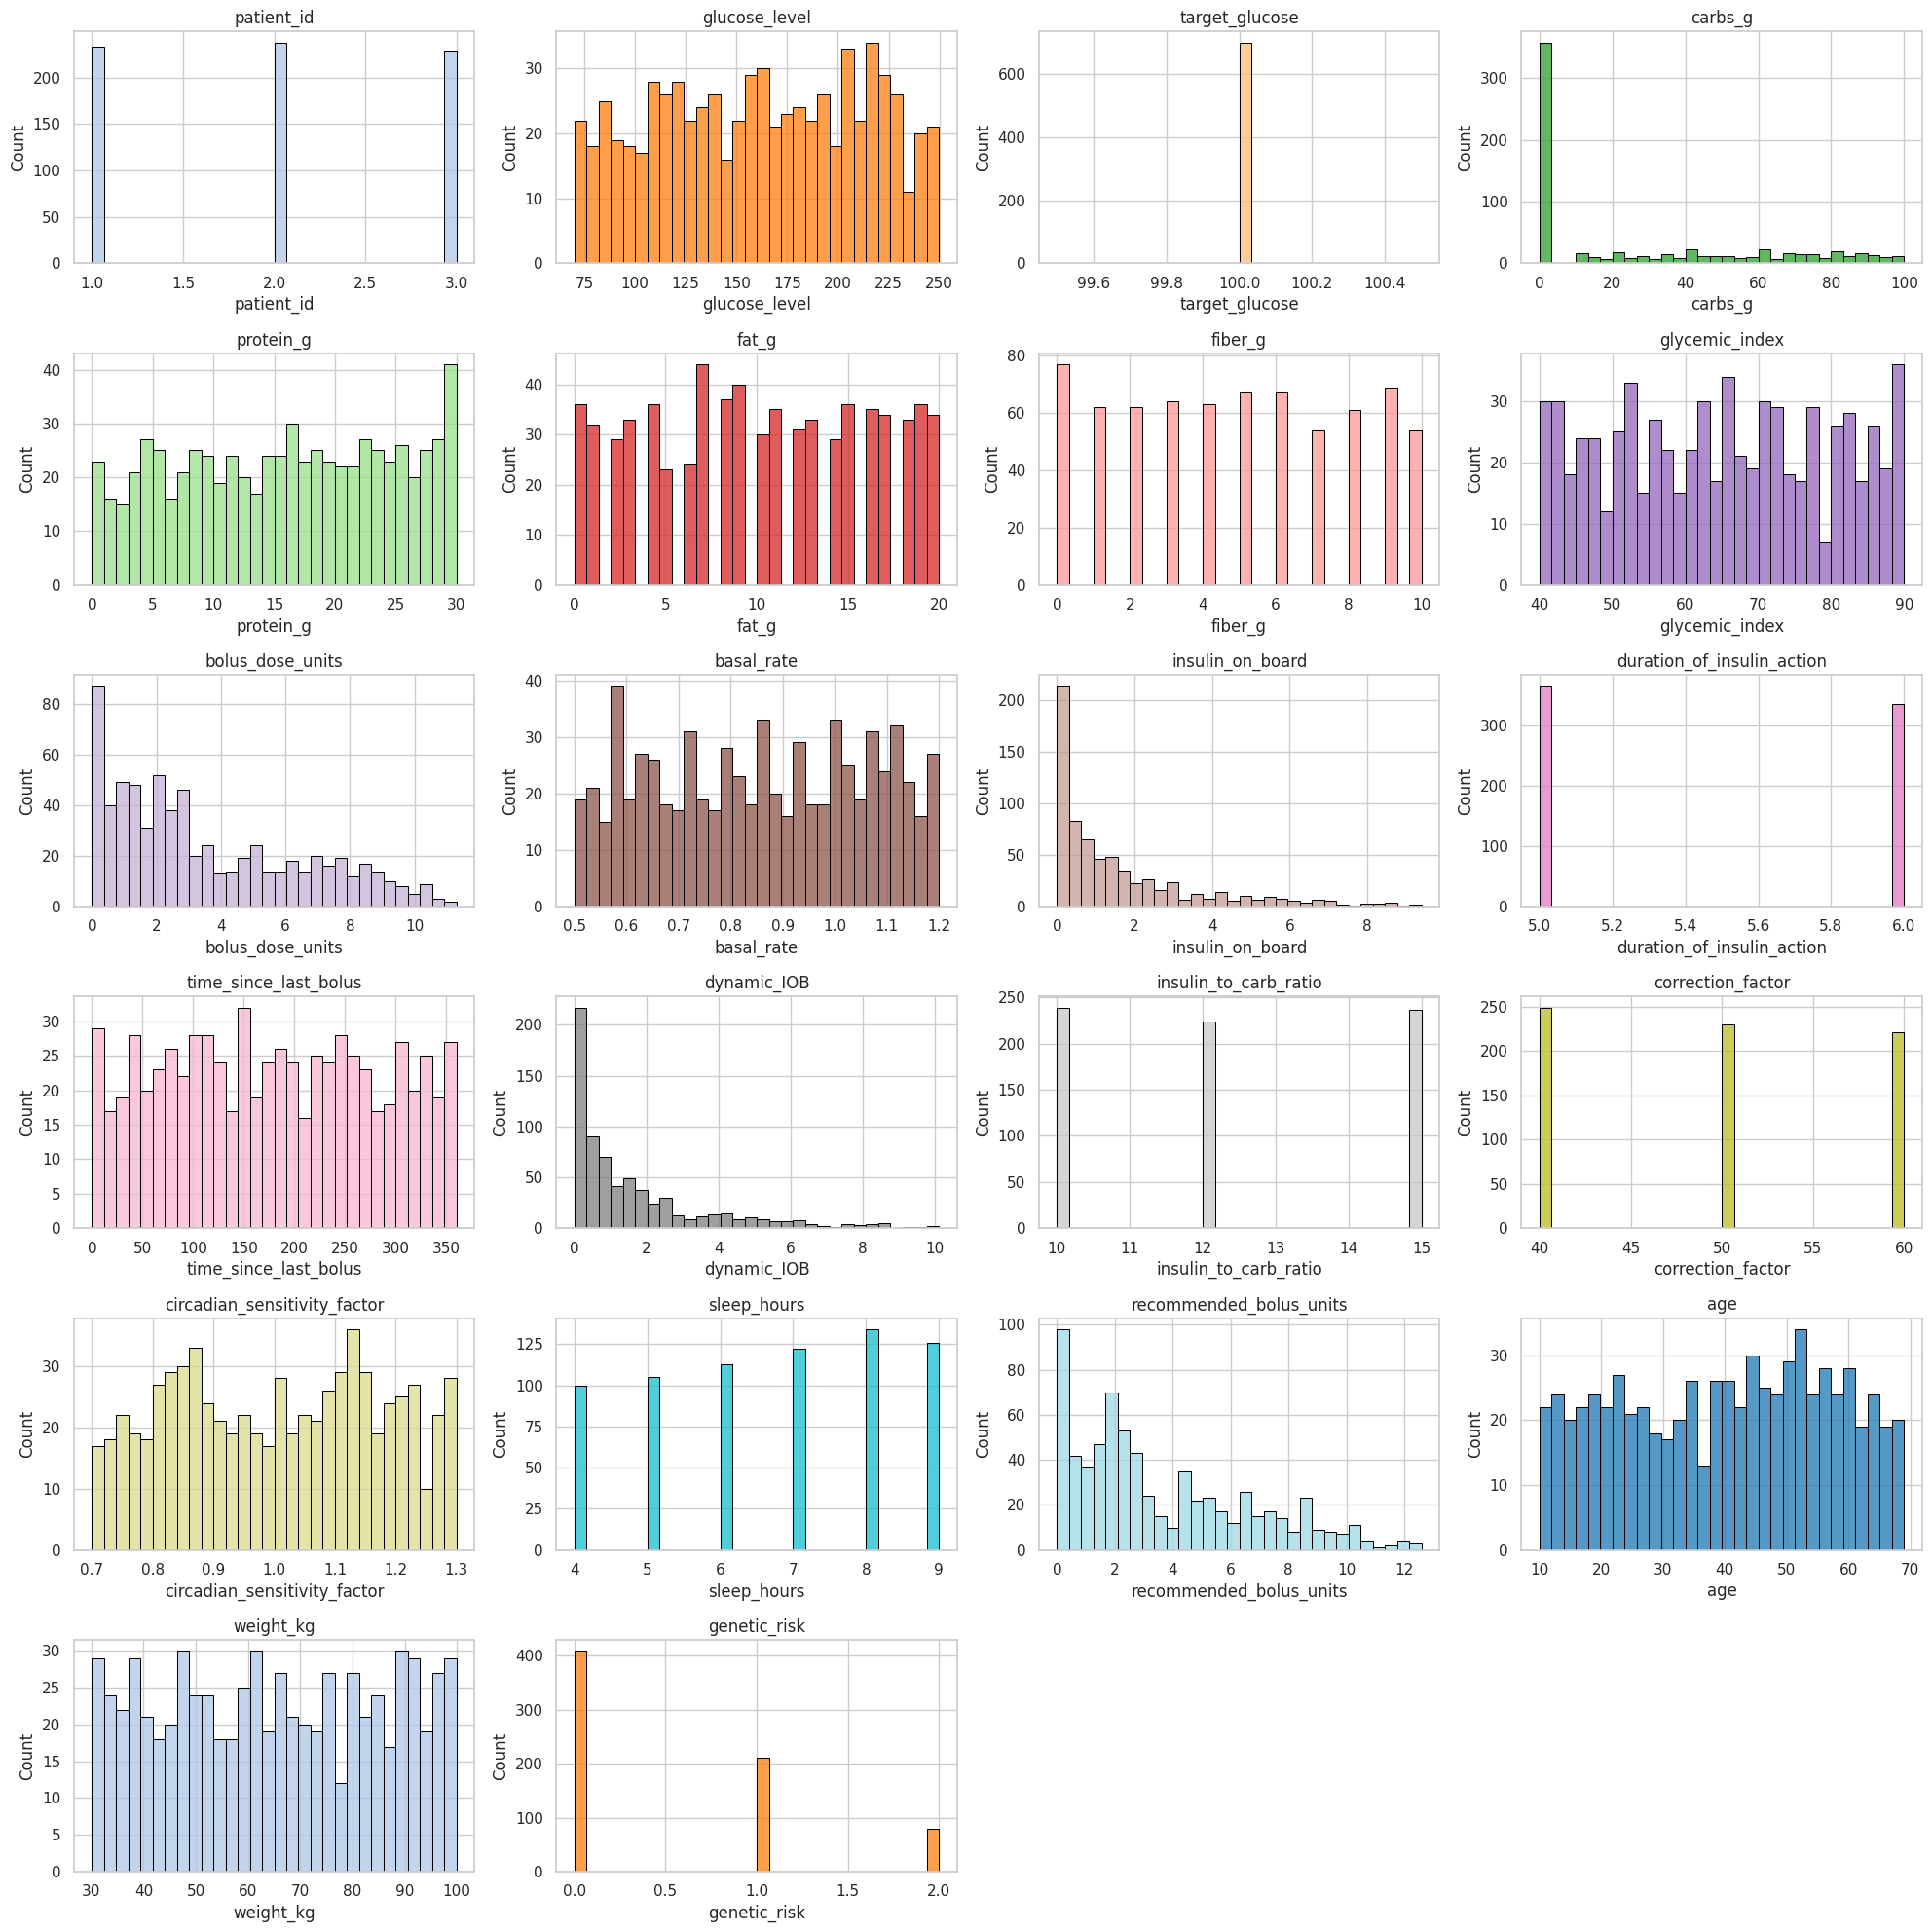

In [17]:
#Distribution of Numerical Features

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
num_plots = len(numeric_cols)

plt.figure(figsize=(20, 20))

colors = plt.cm.tab20.colors  # 20 unique colors

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((num_plots//4)+1, 4, i)
    sns.histplot(df[col], bins=30, color=colors[i % len(colors)], edgecolor="black")
    plt.title(col, fontsize=12)

plt.tight_layout()
plt.show()

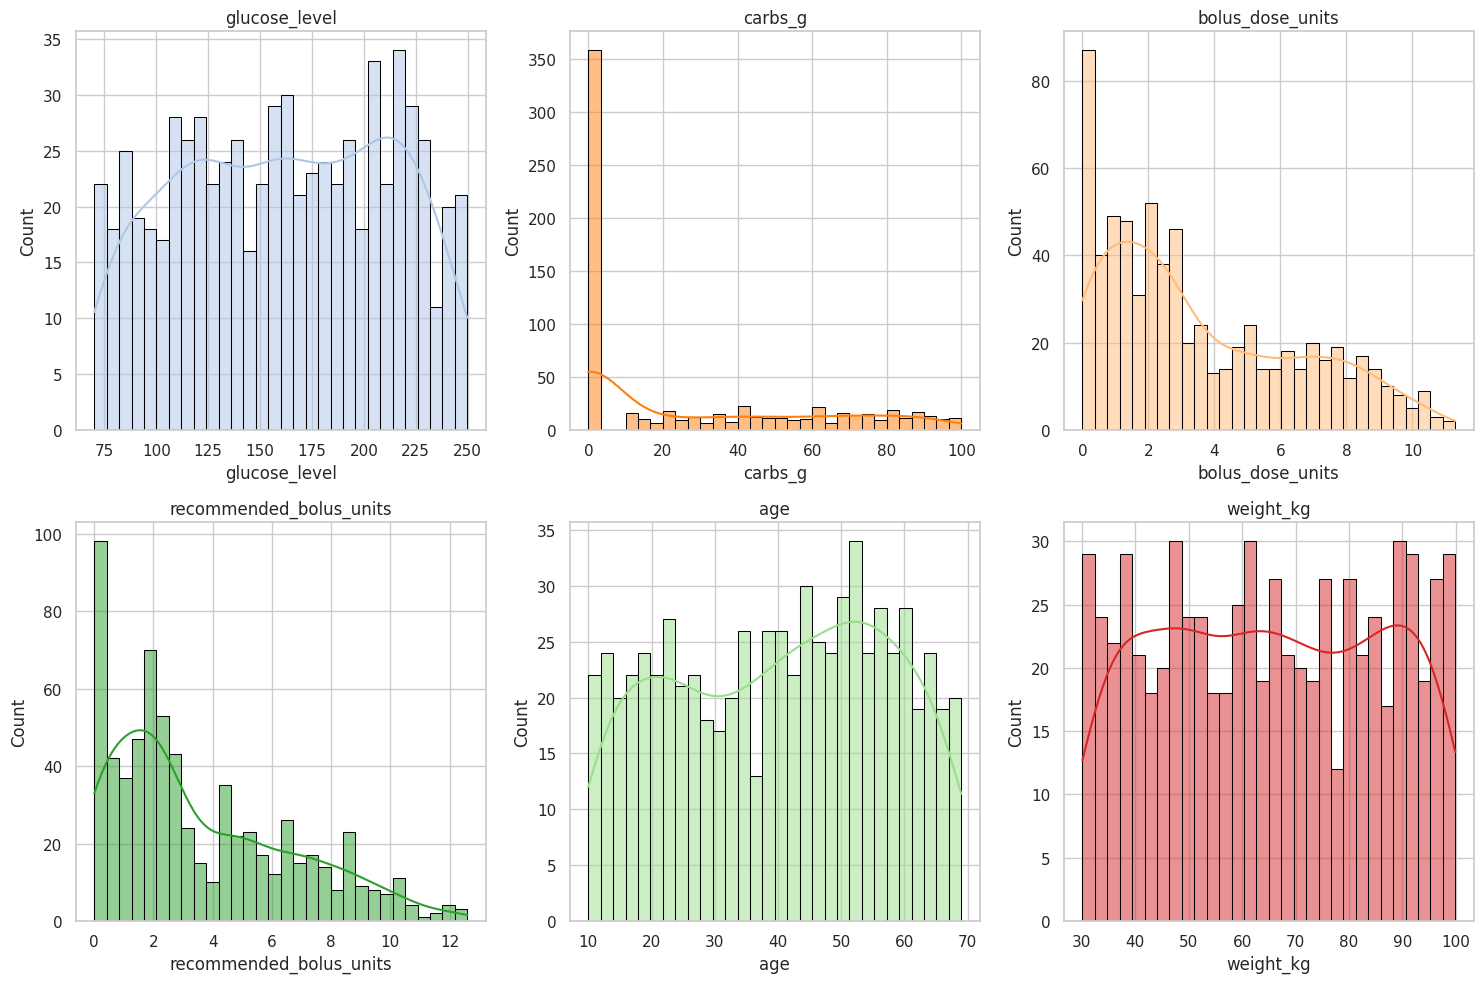

In [18]:
#Distribution Of Important Coloumn

important_cols = ["glucose_level", "carbs_g", "bolus_dose_units",
                  "recommended_bolus_units", "age", "weight_kg"]

plt.figure(figsize=(15, 10))

for i, col in enumerate(important_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color=colors[i % len(colors)], edgecolor="black")
    plt.title(col, fontsize=12)

plt.tight_layout()
plt.show()

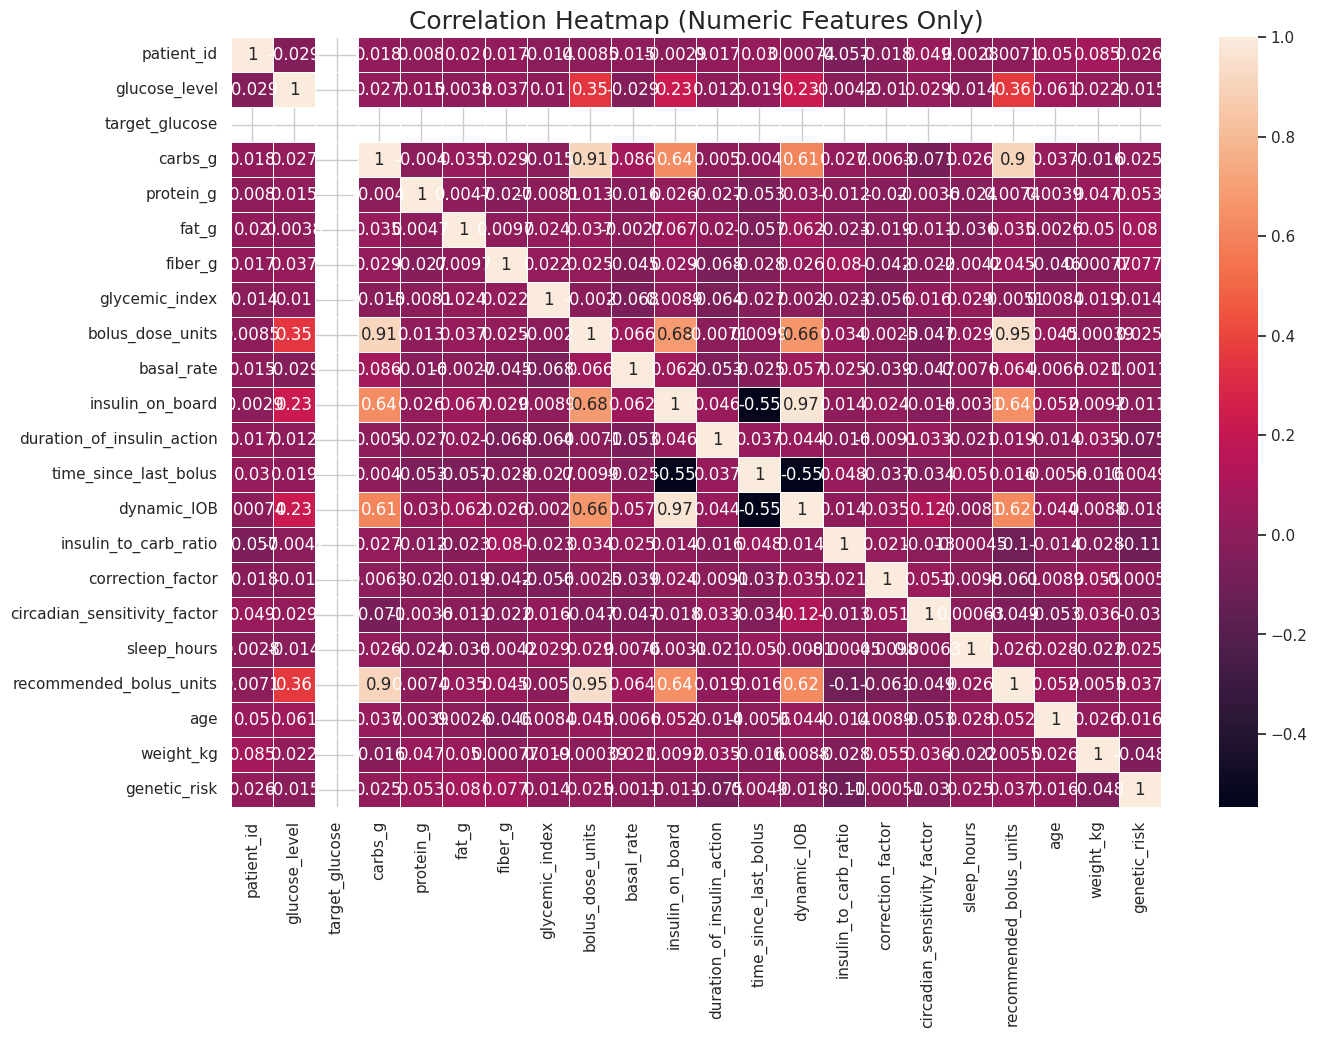

In [19]:
#Correlation

# Select Numeric Coloumn
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation
plt.figure(figsize=(15,10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="rocket", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=18)
plt.show()

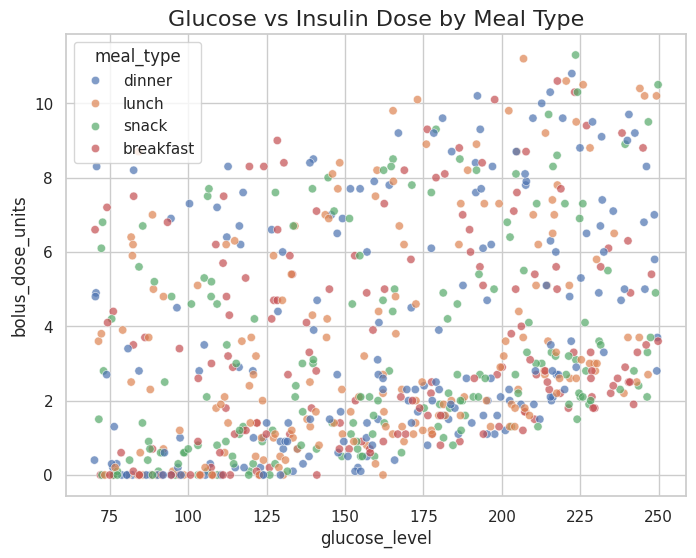

In [20]:
#Glucose vs Insulin

plt.figure(figsize=(8,6))
sns.scatterplot(x="glucose_level", y="bolus_dose_units", hue="meal_type", data=df, alpha=0.7)
plt.title("Glucose vs Insulin Dose by Meal Type", fontsize=16)
plt.show()

/tmp/ipython-input-4182916177.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="meal_type", y="carbs_g", data=df, estimator=sum, ci=None, palette=palette_meals)
/tmp/ipython-input-4182916177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="meal_type", y="carbs_g", data=df, estimator=sum, ci=None, palette=palette_meals)


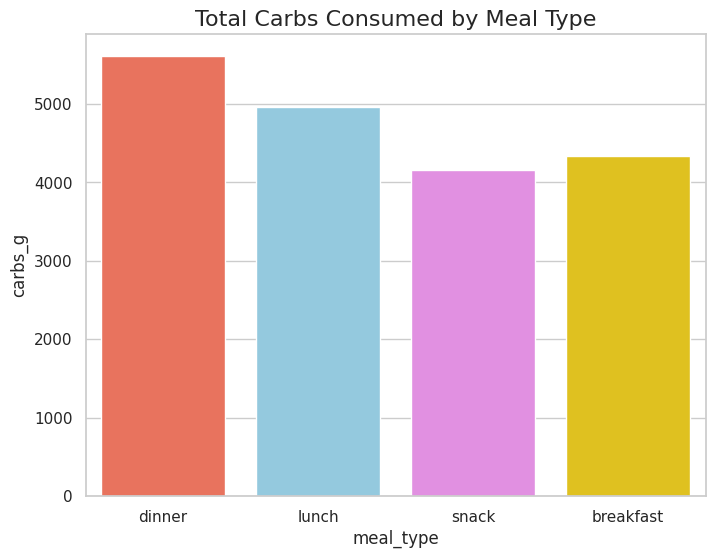

In [21]:
#Average Carbs per Meal

plt.figure(figsize=(8,6))
palette_meals = {"breakfast": "gold", "lunch": "skyblue", "dinner": "tomato", "snack": "violet"}
sns.barplot(x="meal_type", y="carbs_g", data=df, estimator=sum, ci=None, palette=palette_meals)
plt.title("Total Carbs Consumed by Meal Type", fontsize=16)
plt.show()

/tmp/ipython-input-3341836056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="stress_level", y="recommended_bolus_units", data=df, palette=palette_stress)


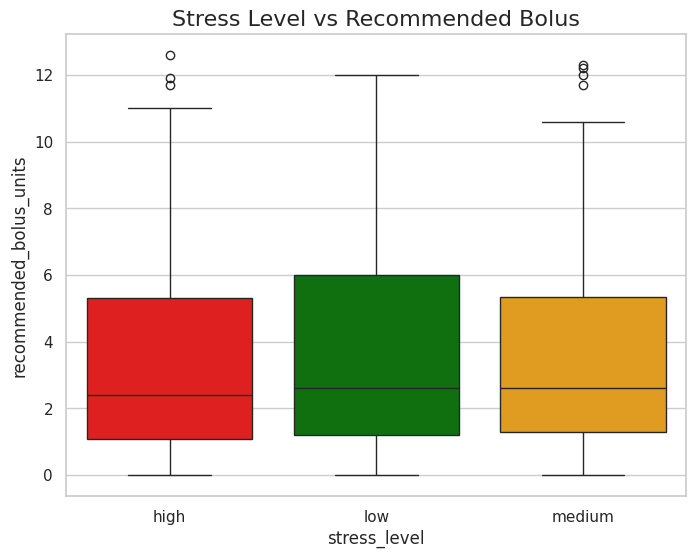

In [22]:
#Stress vs Recommended Bolus

plt.figure(figsize=(8,6))
palette_stress = {"low": "green", "medium": "orange", "high": "red"}
sns.boxplot(x="stress_level", y="recommended_bolus_units", data=df, palette=palette_stress)
plt.title("Stress Level vs Recommended Bolus", fontsize=16)
plt.show()

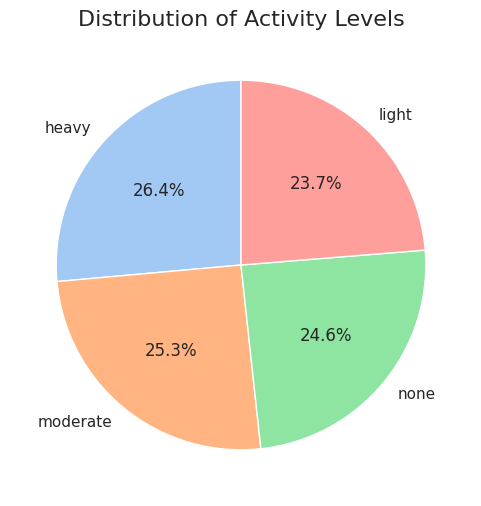

In [23]:
#Activity Levels

plt.figure(figsize=(6,6))
df["activity_level"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribution of Activity Levels", fontsize=16)
plt.ylabel("")
plt.show()

## 4.  Key Derived Features

Import

In [24]:
import pandas as pd
import numpy as np
from datetime import timedelta
import math

In [25]:
# Combine date and time into single datetime column (handles if date is already str/date/time objects)
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))
df = df.sort_values(['patient_id','datetime']).reset_index(drop=True)

# Ensure numeric columns are numeric (coerce errors to NaN)
numeric_cols = ['glucose_level','target_glucose','carbs_g','protein_g','fat_g','fiber_g',
                'bolus_dose_units','basal_rate','insulin_on_board','duration_of_insulin_action',
                'time_since_last_bolus','dynamic_IOB','insulin_to_carb_ratio','correction_factor',
                'circadian_sensitivity_factor','sleep_hours','recommended_bolus_units','age','weight_kg','glycemic_index']
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Quick minimal imputation for preprocessing (we will show smarter imputation later if needed)
df['target_glucose'] = df['target_glucose'].fillna(100)
df['duration_of_insulin_action'] = df['duration_of_insulin_action'].fillna(5)  # default DIA
df['bolus_dose_units'] = df['bolus_dose_units'].fillna(0)
df['insulin_on_board'] = df['insulin_on_board'].fillna(0)

print("Prepared dataframe with", df.shape, "rows. Datetime column created.")

Prepared dataframe with (700, 29) rows. Datetime column created.


In [26]:
#Full feature preparation



Static IOB (sIOB)-This creates a reusable insulin action profile and computes sIOB at each row by summing contributions of prior boluses within DIA for the same patient.

In [27]:
# Compute sIOB (static insulin on board)
def insulin_action_profile(duration_hours=5, resolution_min=5, shape='linear'):
    """Return an array of activity fractions for each resolution step from t=0..DIA."""
    steps = int(duration_hours * 60 / resolution_min) + 1
    t = np.linspace(0, duration_hours, steps)  # in hours
    if shape == 'linear':
        # simple linear decay from 1 -> 0
        weights = 1 - (t / duration_hours)
    elif shape == 'exponential':
        # exponential-like decay (fast early, long tail)
        decay_k = 3.0  # adjust for sharper/fainter tail
        weights = np.exp(-decay_k * t / duration_hours)
        weights = weights / weights[0]  # normalize to 1 at t=0
    elif shape == 'gamma':
        # gamma-like shape (slow rise, fall) — example params
        from scipy.stats import gamma
        a = 2.0
        x = t + 1e-6
        pdf = gamma.pdf(x / duration_hours * 10, a)
        weights = pdf / pdf.max()
    else:
        raise ValueError("unknown shape")
    weights = np.clip(weights, 0, 1)
    return weights


In [28]:
# Helper to compute sIOB per patient
def compute_sIOB_for_group(g, resolution_min=5, profile=None):
    times = g['datetime'].values
    boluses = g['bolus_dose_units'].fillna(0).values
    dia_hours = g['duration_of_insulin_action'].fillna(5).values  # can vary per row; we'll use row-specific
    n = len(g)
    sIOB = np.zeros(n)
    if profile is None:
        profile = insulin_action_profile(duration_hours=5, resolution_min=resolution_min, shape='linear')
    # For each index i, sum remaining activity of prior boluses
    for i in range(n):
        t_i = times[i]
        # walk backwards until beyond DIA max (use max DIA or row-specific)
        j = i - 1
        while j >= 0:
            dt_min = (t_i - times[j]) / np.timedelta64(1, 'm')
            if dt_min < 0:
                j -= 1
                continue
            # use DIA from the bolus event row j (or use current row's DIA)
            dia = dia_hours[j] if not math.isnan(dia_hours[j]) else 5
            if dt_min > dia * 60:
                break
            idx = int(dt_min // resolution_min)
            # pick profile corresponding to that dia (scale if dia != profile duration)
            # scale index proportional to dia/profile_duration
            profile_steps = len(profile)
            # map idx to profile index
            mapped_idx = min(int(idx * (profile_steps-1) / (dia * 60 / resolution_min)), profile_steps-1)
            remaining_frac = profile[mapped_idx]
            sIOB[i] += boluses[j] * remaining_frac
            j -= 1
    g = g.copy()
    g['sIOB'] = sIOB
    return g

In [29]:
# Run per patient
profile_default = insulin_action_profile(duration_hours=5, resolution_min=5, shape='linear')
df = df.groupby('patient_id', group_keys=False).apply(lambda g: compute_sIOB_for_group(g, resolution_min=5, profile=profile_default))
print("sIOB computed.")

sIOB computed.


/tmp/ipython-input-1238967982.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient_id', group_keys=False).apply(lambda g: compute_sIOB_for_group(g, resolution_min=5, profile=profile_default))


Dynamic IOB (dIOB)-We implement a default circadian multiplier curve (hours → multiplier).

In [30]:
# Default circadian multipliers (tweak as you like)
circadian_curve = {
    # hour : multiplier — example heuristic. Adjust per Doc2 if you have exact table.
    0: 0.9, 1: 0.9, 2: 0.9, 3: 0.9, 4: 0.95,
    5: 1.05, 6: 1.1, 7: 1.2, 8: 1.15, 9: 1.05,
    10: 1.0, 11: 0.98, 12: 1.0, 13: 1.02, 14: 1.0,
    15: 1.0, 16: 1.0, 17: 1.05, 18: 1.08, 19: 1.1,
    20: 1.05, 21: 1.0, 22: 0.98, 23: 0.95
}

def circadian_multiplier(ts, anticipation_hours=1):
    # ts is a pd.Timestamp
    h = int(((ts.hour + anticipation_hours) % 24))
    return circadian_curve.get(h, 1.0)

# Apply per-row
df['circ_multiplier'] = df['datetime'].apply(lambda x: circadian_multiplier(x, anticipation_hours=1))
df['dIOB'] = df['sIOB'] * df['circ_multiplier']

In [31]:
print("dIOB computed (sIOB * circadian multiplier).")

dIOB computed (sIOB * circadian multiplier).


Time-since-last-bolus, sum of last N boluses, cumulative 4–6 hour insulin (stacking)

In [32]:
#Stacking features

def stacking_features(g, windows_minutes=[240, 360], last_n=3):
    g = g.copy().reset_index(drop=True)
    times = g['datetime'].values
    boluses = g['bolus_dose_units'].fillna(0).values
    n = len(g)
    tslb = np.full(n, np.nan)  # time since last bolus (min)
    sum_lastn = np.zeros(n)
    sum_windows = {w: np.zeros(n) for w in windows_minutes}
    last_bolus_time = None
    for i in range(n):
        # time since last bolus
        if i == 0:
            tslb[i] = np.nan
        else:
            # find previous bolus index where bolus>0
            prev_idx = i-1
            while prev_idx >= 0 and boluses[prev_idx] == 0:
                prev_idx -= 1
            if prev_idx >= 0:
                tslb[i] = (times[i] - times[prev_idx]) / np.timedelta64(1, 'm')
            else:
                tslb[i] = np.nan
        # sum of last N boluses
        # look back and find previous non-zero boluses
        vals = []
        idx = i-1
        while idx >=0 and len(vals) < last_n:
            if boluses[idx] > 0:
                vals.append(boluses[idx])
            idx -= 1
        sum_lastn[i] = np.sum(vals) if vals else 0.0
        # window sums
        j = i-1
        while j >= 0:
            dt_min = (times[i] - times[j]) / np.timedelta64(1, 'm')
            if dt_min < 0:
                j -= 1
                continue
            for w in windows_minutes:
                if dt_min <= w:
                    sum_windows[w][i] += boluses[j]
            if dt_min > max(windows_minutes):
                break
            j -= 1
    g['time_since_last_bolus_min'] = tslb
    g[f'sum_last_{last_n}_boluses'] = sum_lastn
    for w in windows_minutes:
        g[f'sum_bolus_last_{int(w/60)}h'] = sum_windows[w]
    return g

In [33]:
df = df.groupby('patient_id', group_keys=False).apply(lambda g: stacking_features(g, windows_minutes=[240,360], last_n=3))

/tmp/ipython-input-3442150498.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient_id', group_keys=False).apply(lambda g: stacking_features(g, windows_minutes=[240,360], last_n=3))


In [34]:
print("Stacking features computed: time_since_last_bolus_min, sum_last_3_boluses, sum_bolus_last_4h, sum_bolus_last_6h.")

Stacking features computed: time_since_last_bolus_min, sum_last_3_boluses, sum_bolus_last_4h, sum_bolus_last_6h.


Carb rate & fat/protein adjusted carbs (Doc3 heuristic)-compute carb_duration_min (heuristic), carb_rate_g_per_hr, and adj_carbs (adjust carbs by protein/fat using simple factors).

In [35]:
# Carb rate and Adjusted carbs for meal absorption

meal_default_duration = {'breakfast': 60, 'lunch': 90, 'dinner': 120, 'snack': 30}

def carb_duration(row):
    dur = meal_default_duration.get(row.get('meal_type','snack'), 60)
    bt = str(row.get('bolus_type','normal')).lower()
    if 'square' in bt:
        dur = max(dur, 120)
    if 'dual' in bt:
        dur = max(dur, 180)
    return dur

df['carb_duration_min'] = df.apply(carb_duration, axis=1)
df['carb_rate_g_per_hr'] = df['carbs_g'] / (df['carb_duration_min'] / 60.0 + 1e-6)

In [36]:
# Simple Carb equivalents
protein_to_carb = 0.10  # 10% of protein counted as carb-equivalent (tweakable)
fat_to_carb = 0.03      # 3% of fat counted as carb-equivalent (tweakable)
df['adj_carbs_g'] = df['carbs_g'] + df['protein_g'].fillna(0) * protein_to_carb + df['fat_g'].fillna(0) * fat_to_carb

print("Carb rate and adjusted carbs computed.")

Carb rate and adjusted carbs computed.


Clock features & Meal(one-hot encoding)- Create cyclical time features and meal one-hot columns (with fixed colors earlier for plotting).

In [37]:
# Clock features and Meal encoding

df['minute_of_day'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute
# cyclical encoding
df['time_sin'] = np.sin(2 * np.pi * df['minute_of_day'] / 1440.0)
df['time_cos'] = np.cos(2 * np.pi * df['minute_of_day'] / 1440.0)

# Meal one-hot (if you prefer ordinal mapping, use map)
meal_dummies = pd.get_dummies(df['meal_type'].fillna('unknown'), prefix='meal')
df = pd.concat([df, meal_dummies], axis=1)

In [38]:
print("Clock features (time_sin/time_cos) and meal one-hot added.")

Clock features (time_sin/time_cos) and meal one-hot added.


Personalization - Compute per-patient mean ICR, mean correction_factor, and bolus_per_kg feature.

In [39]:
# Personalization features
patient_stats = df.groupby('patient_id').agg({
        'insulin_to_carb_ratio':'median',
        'correction_factor':'median',
        'glucose_level':'mean'
    }).rename(columns={'insulin_to_carb_ratio':'median_ICR','correction_factor':'median_ISF','glucose_level':'mean_glucose'})

In [40]:
# Map back to rows
df = df.merge(patient_stats, left_on='patient_id', right_index=True, how='left', suffixes=('', '_patient_median'))

In [41]:
# Weight-normalized
df['bolus_per_kg'] = df['bolus_dose_units'] / (df['weight_kg'] + 1e-6)
df['recommended_bolus_per_kg'] = df['recommended_bolus_units'] / (df['weight_kg'] + 1e-6)

In [42]:
print("Personalization features added (median ICR/ISF, bolus_per_kg).")
print("Features prepared. New columns: ", [c for c in df.columns if c not in (list(df_in.columns) if 'df_in' in locals() else [])][:40])

Personalization features added (median ICR/ISF, bolus_per_kg).
Features prepared. New columns:  ['patient_id', 'date', 'time', 'glucose_level', 'target_glucose', 'carbs_g', 'protein_g', 'fat_g', 'fiber_g', 'meal_type', 'glycemic_index', 'bolus_dose_units', 'bolus_type', 'basal_rate', 'insulin_on_board', 'duration_of_insulin_action', 'time_since_last_bolus', 'dynamic_IOB', 'insulin_to_carb_ratio', 'correction_factor', 'circadian_sensitivity_factor', 'stress_level', 'activity_level', 'sleep_hours', 'recommended_bolus_units', 'age', 'weight_kg', 'genetic_risk', 'datetime', 'sIOB', 'circ_multiplier', 'dIOB', 'time_since_last_bolus_min', 'sum_last_3_boluses', 'sum_bolus_last_4h', 'sum_bolus_last_6h', 'carb_duration_min', 'carb_rate_g_per_hr', 'adj_carbs_g', 'minute_of_day']


## 5. Model Approach

Rule-based baseline bolus calculation - bolus = carbs / ICR + (glucose - target) / ISF - IOB (clipped to >=0). We'll calculate both using insulin_on_board and using dIOB.

In [43]:
# Rule-based bolus calculators

def rule_based_bolus_row(row, use_dIOB=True, default_target=100):
    ICR = row.get('insulin_to_carb_ratio') if not np.isnan(row.get('insulin_to_carb_ratio', np.nan)) else row.get('median_ICR', 12)
    ISF = row.get('correction_factor') if not np.isnan(row.get('correction_factor', np.nan)) else row.get('median_ISF', 50)
    carbs = row.get('adj_carbs_g', 0)
    glucose = row.get('glucose_level', default_target)
    target = row.get('target_glucose', default_target)
    IOB = row['dIOB'] if use_dIOB and not np.isnan(row.get('dIOB', np.nan)) else row.get('insulin_on_board', 0)
    carb_part = carbs / (ICR + 1e-6)
    correction_part = (glucose - target) / (ISF + 1e-6)
    bolus = carb_part + correction_part - IOB
    return max(round(bolus,1), 0.0)

df['rule_bolus_dIOB'] = df.apply(lambda r: rule_based_bolus_row(r, use_dIOB=True), axis=1)
df['rule_bolus_IOB'] = df.apply(lambda r: rule_based_bolus_row(r, use_dIOB=False), axis=1)

In [44]:
print("Rule-based boluses added.")

Rule-based boluses added.


XGBoost on tabular features - A simple pipeline: select features, encode categoricals, train XGBRegressor to predict recommended_bolus_units.

In [45]:
# XGBoost baseline model (tabular)

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

# choose feature columns

feature_cols = [
    'glucose_level','adj_carbs_g','carb_rate_g_per_hr','sIOB','dIOB',
    'time_sin','time_cos','age','weight_kg','bolus_per_kg',
    'median_ICR','median_ISF','sum_bolus_last_4h','sum_bolus_last_6h'
]

# add meal

feature_cols += [c for c in df.columns if c.startswith('meal_')]

available_features = [c for c in feature_cols if c in df.columns]
print("Using features:", available_features)

Using features: ['glucose_level', 'adj_carbs_g', 'carb_rate_g_per_hr', 'sIOB', 'dIOB', 'time_sin', 'time_cos', 'age', 'weight_kg', 'bolus_per_kg', 'median_ICR', 'median_ISF', 'sum_bolus_last_4h', 'sum_bolus_last_6h', 'meal_type', 'meal_breakfast', 'meal_dinner', 'meal_lunch', 'meal_snack']


In [46]:
model_df = df[available_features + ['recommended_bolus_units']].copy().dropna()
X = model_df[available_features]
y = model_df['recommended_bolus_units']

In [47]:
# one-hot (if any objects remain)
X = pd.get_dummies(X, drop_first=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {'objective':'reg:squarederror','eval_metric':'mae','seed':42}
bst = xgb.train(params, dtrain, num_boost_round=200, evals=[(dtest,'test')], early_stopping_rounds=20, verbose_eval=False)

In [49]:
# predict + metrics
y_pred = bst.predict(dtest)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(((y_test - y_pred)**2).mean())
print(f"XGBoost MAE: {mae:.4f}, RMSE: {rmse:.4f}")

XGBoost MAE: 0.6406, RMSE: 1.1588


Evaluation checks - Compute standard errors and count predictions that deviate more than 1U / 2U from recommended.

In [50]:
# Apply model to full test set (use X_test from previous block)
import numpy as np

preds = y_pred
abs_err = np.abs(y_test - preds)

print("Mean absolute error:", np.mean(abs_err))
print("Fraction >1U:", np.mean(abs_err > 1.0))
print("Fraction >2U:", np.mean(abs_err > 2.0))

Mean absolute error: 0.6405838245299778
Fraction >1U: 0.19285714285714287
Fraction >2U: 0.07142857142857142


In [51]:
# Rough conservative safety flag: if predicted bolus > recommended + 2 units -> flag

import pandas as pd

# If X_test is numpy array, convert back
safety_df = pd.DataFrame(X_test, columns=X.columns)

# Add prediction results
safety_df['pred'] = preds
safety_df['true'] = y_test  # already numpy
safety_df['err'] = safety_df['pred'] - safety_df['true']

# Flag risky cases
safety_df['safety_flag'] = safety_df['err'] > 2.0

print("Safety flags count:", safety_df['safety_flag'].sum())


Safety flags count: 7


In [52]:
# Feature importance
fi = bst.get_score(importance_type='weight')
fi_sorted = sorted(fi.items(), key=lambda x: x[1], reverse=True)
print("Top feature importances:", fi_sorted[:10])

Top feature importances: [('f0', 375.0), ('f1', 238.0), ('f8', 145.0), ('f5', 134.0), ('f9', 122.0), ('f2', 97.0), ('f7', 92.0), ('f3', 88.0), ('f6', 85.0), ('f13', 76.0)]


Pred vs Actual Visualization

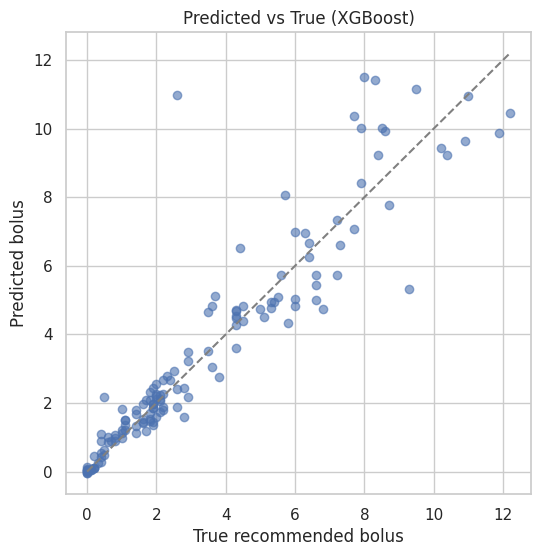

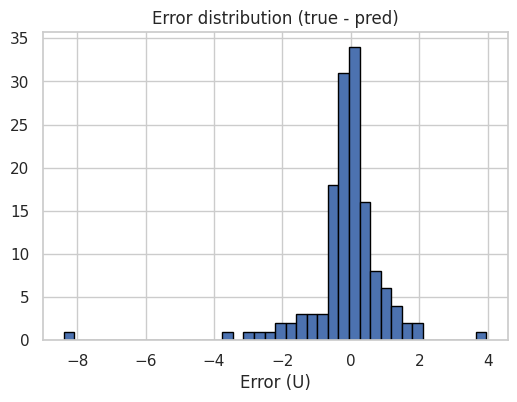

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
mx = max(max(y_test), max(y_pred))
plt.plot([0,mx],[0,mx], '--', color='gray')
plt.xlabel("True recommended bolus")
plt.ylabel("Predicted bolus")
plt.title("Predicted vs True (XGBoost)")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(y_test - y_pred, bins=40, edgecolor='black')
plt.title("Error distribution (true - pred)")
plt.xlabel("Error (U)")
plt.show()

LSTM sequence model skeleton

In [54]:
!pip install -q tensorflow

In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models

Example: prepare sequences build sequences per patient.

seq_X shape: (n_samples, seq_len, n_features)

seq_y: target bolus at end

Here we create dummy example from model_df for demonstration



In [56]:
seq_len = 6  # e.g., last 6 records (~30-min to 3-hrs depending on spacing)
features_for_seq = ['glucose_level','bolus_dose_units','adj_carbs_g','sIOB','dIOB']

In [57]:
# Build overlapping sequences per patient
def build_sequences(df, features, seq_len=6, target_col='recommended_bolus_units'):
    Xs = []; ys = []
    for pid, g in df.groupby('patient_id'):
        g = g.sort_values('datetime').reset_index(drop=True)
        vals = g[features].fillna(0).values
        targ = g[target_col].fillna(0).values
        for i in range(len(g)-seq_len):
            Xs.append(vals[i:i+seq_len])
            ys.append(targ[i+seq_len])  # predict next
    return np.array(Xs), np.array(ys)

In [58]:
# create sequences (may be empty if insufficient data)
X_seq, y_seq = build_sequences(df, features_for_seq, seq_len=seq_len)
print("Seq data shape:", X_seq.shape)
if X_seq.shape[0] > 10:
    # simple LSTM
    model = models.Sequential([
        layers.Input(shape=(seq_len, len(features_for_seq))),
        layers.LSTM(64, return_sequences=False),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    # quick train/val split
    i = int(0.8*len(X_seq))
    model.fit(X_seq[:i], y_seq[:i], validation_data=(X_seq[i:], y_seq[i:]), epochs=10, batch_size=32)
else:
    print("Not enough sequential samples to train LSTM — collect denser CGM/bolus history.")

Seq data shape: (682, 6, 5)
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 15.8829 - mae: 2.9375 - val_loss: 9.8409 - val_mae: 2.3698
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.7632 - mae: 2.5910 - val_loss: 8.8724 - val_mae: 2.5664
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.5975 - mae: 2.5698 - val_loss: 8.7232 - val_mae: 2.4830
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1572 - mae: 2.4906 - val_loss: 8.6800 - val_mae: 2.4665
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.8122 - mae: 2.4703 - val_loss: 8.7125 - val_mae: 2.5293
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3876 - mae: 2.4223 - val_loss: 8.6472 - val_mae: 2.4249
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.1173 - mae: 2.3072 - val_loss: 8.6445 - val_mae: 2.4510
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.5525 - mae: 2.4312 - val_loss: 8.6432 - val_mae: 2.5016
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━

Hybrid & ML residuals - a simulator or physiologic model to give predicted CGM/response for a candidate bolus. The hybrid approach trains an ML model to predict residual between simulator output and real data.

1) Use a simulator function simulate(patient_params, history, candidate_bolus) -> predicted_glucose_traj
2) Compute simulator_pred_bolus_effect (e.g., predicted glucose drop at 1h or time-in-range)
3) Residual = observed_outcome - simulator_predicted_outcome
4) Train ML on features + simulator_predicted_outcome to predict Residual
5) Final prediction = simulator_prediction + ML_predicted_residual

In [59]:
# PSEUDO implementation
def simulator_predict_effect(row, candidate_bolus): # Placeholder: integrate UVa/Padova or other model here.
  return candidate_bolus * (row.get('median_ISF',50)) #return simple expected drop = candidate_bolus * median_ISF

In [60]:
# Create training set for residual model
# For each row compute sim_effect for true bolus and compute residual between observed correction and sim

df['sim_effect_true'] = df.apply(lambda r: simulator_predict_effect(r, r.get('recommended_bolus_units',0)), axis=1) # Observed effect (crude): glucose - future_glucose_not_available -> cannot compute without future CGM
print("Hybrid skeleton prepared. Integrate real simulator and observed outcomes to train residual model.")

Hybrid skeleton prepared. Integrate real simulator and observed outcomes to train residual model.


Probabilistic / Quantile Regression

In [61]:
#Quantile regression using sklearn

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [62]:
X_all = X  # from earlier one-hot encoded matrix
y_all = y

Xtr, Xv, ytr, yv = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Quantile models
q_low = GradientBoostingRegressor(loss='quantile', alpha=0.1, n_estimators=100, max_depth=3)
q_high = GradientBoostingRegressor(loss='quantile', alpha=0.9, n_estimators=100, max_depth=3)
q_median = GradientBoostingRegressor(loss='squared_error', n_estimators=100, max_depth=3)  # was 'ls'

# Train
q_low.fit(Xtr, ytr)
q_high.fit(Xtr, ytr)
q_median.fit(Xtr, ytr)

# Predict
pred_low = q_low.predict(Xv)
pred_med = q_median.predict(Xv)
pred_high = q_high.predict(Xv)

In [63]:
print("Prediction intervals generated.")

Prediction intervals generated.


## 6.Loss Function And Evaluation Metrices

Standard regression metrics (MAE / RMSE),

In [64]:
# MAE / RMSE and simple predicted vs actual plot
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Inputs expected:
# y_true : 1D array-like of true recommended bolus (e.g., y_test or yv)
# y_pred : 1D array-like of predicted bolus (same shape as y_true)
# test_df (optional) : DataFrame aligned with y_true/y_pred for clinical proxies (glucose_level, median_ISF etc.)

# Example names from earlier blocks:
# y_true = y_test
# y_pred = y_pred

def regression_metrics_and_plot(y_true, y_pred, title="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{title} MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    # Scatter
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    mx = max(np.nanmax(y_true), np.nanmax(y_pred))
    plt.plot([0, mx], [0, mx], '--', color='gray')
    plt.xlabel("True recommended bolus (U)")
    plt.ylabel("Predicted bolus (U)")
    plt.title(f"{title}: Predicted vs True")
    plt.show()
    # Error histogram
    plt.figure(figsize=(6,3))
    errs = np.array(y_true) - np.array(y_pred)
    plt.hist(errs, bins=40, edgecolor='black')
    plt.xlabel("Error (True - Pred) [U]")
    plt.title("Error distribution")
    plt.show()
    return mae, rmse

XGBoost MAE: 0.6406, RMSE: 1.1588


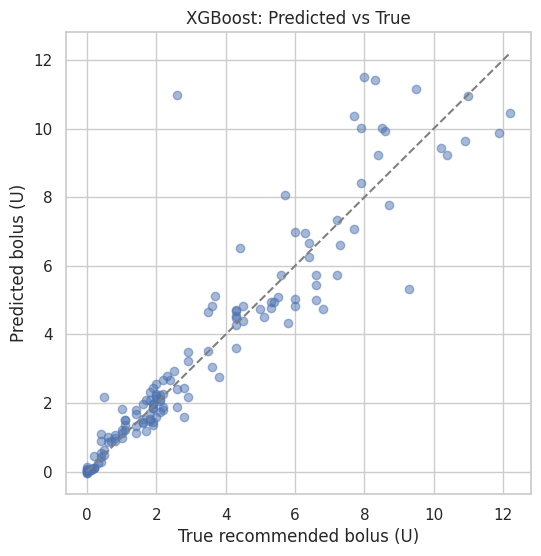

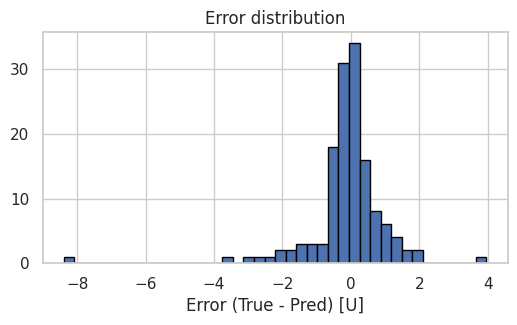

In [65]:
# Example call:
mae, rmse = regression_metrics_and_plot(y_test, y_pred, title="XGBoost")

Clinically-oriented proxy metrics (hypoglycemia risk if predicted dose were applied, and a crude time-in-range (TIR) proxy)

This block implements a conservative linear proxy: predicted immediate glucose after predicted bolus = glucose_level - pred_bolus * ISF.

It flags predicted hypoglycemia (glucose < 70 mg/dL) and computes a crude TIR proxy (predicted glucose in 70–180).

 Uses median_ISF if available, else correction_factor, else default 50 mg/dL per U.

In [66]:
# Clinical proxy metrics (approximate)
import pandas as pd
import numpy as np

def clinical_proxy_stats(test_df, pred_col='pred'):
    """
    test_df must contain columns: 'glucose_level', and either 'median_ISF' or 'correction_factor'.
    pred_col is the column with predicted bolus to evaluate.
    Returns (%) predicted hypo, (%) predicted TIR, and sample of computed columns.
    """
    df = test_df.copy()
    # choose ISF (mg/dL per U): median_ISF (preferred) -> correction_factor -> default 50
    df['ISF_used'] = df.get('median_ISF', pd.Series(np.nan, index=df.index))
    df['ISF_used'] = df['ISF_used'].fillna(df.get('correction_factor', np.nan))
    df['ISF_used'] = df['ISF_used'].fillna(50.0)
    # predicted immediate glucose post-bolus (crude, linear)
    df['pred_glucose_after'] = df['glucose_level'] - df[pred_col] * df['ISF_used']
    df['hypo_flag'] = df['pred_glucose_after'] < 70
    df['in_range_flag'] = df['pred_glucose_after'].between(70, 180)
    pct_hypo = df['hypo_flag'].mean()
    pct_tir = df['in_range_flag'].mean()
    print(f"Approx % predicted hypo if applied: {pct_hypo*100:.2f}%")
    print(f"Approx % predicted TIR (70-180) after dose: {pct_tir*100:.2f}%")
    return pct_hypo, pct_tir, df[['glucose_level', pred_col, 'ISF_used', 'pred_glucose_after', 'hypo_flag', 'in_range_flag']].head(10)

In [67]:
# Example usage:
test_df = model_df.sample(n=len(y_test), random_state=42).reset_index(drop=True)
test_df['pred'] = y_pred  # predicted values aligned to test_df
clinical_proxy_stats(test_df, pred_col='pred')

Approx % predicted hypo if applied: 47.14%
Approx % predicted TIR (70-180) after dose: 52.86%


(np.float64(0.4714285714285714),
 np.float64(0.5285714285714286),
    glucose_level      pred  ISF_used  pred_glucose_after  hypo_flag  \
 0          215.5  1.967316      50.0          117.134192      False   
 1          174.8  1.358013      50.0          106.899366      False   
 2          188.3  1.804392      50.0           98.080383      False   
 3           77.4  2.186120      50.0          -31.906002       True   
 4          177.6  1.852505      50.0           84.974763      False   
 5          158.8  1.833776      50.0           67.111182       True   
 6          140.9  6.995467      50.0         -208.873359       True   
 7           72.5  0.023656      50.0           71.317216      False   
 8           91.9  0.073055      50.0           88.247245      False   
 9          110.1  0.235180      50.0           98.340978      False   
 
    in_range_flag  
 0           True  
 1           True  
 2           True  
 3          False  
 4           True  
 5          False  


## 7. Safety checks function (IOB, max caps, minimum interval)

 This helps prevent obviously unsafe predictions: checks IOB vs predicted bolus, caps dose per kg, and requires minimum time-since-last-bolus.

In [68]:
#Safety checks for a predicted bolus (vectorized)
def safety_checks(df_rows, pred_col='pred', max_units_per_kg=0.5, min_time_since_last_bolus_min=30, max_absolute_units=25):
    """
    Returns DataFrame with safety flags:
      - too_high_per_kg : pred_units / weight_kg > max_units_per_kg
      - low_time_gap : time_since_last_bolus_min < min_time_since_last_bolus_min
      - excessive_absolute : pred_units > max_absolute_units
      - iob_exceeds : pred_units > (max_allowed - current_IOB)  [simple check]
    """
    df = df_rows.copy()
    # per-kg safe check
    df['pred_units'] = df[pred_col].astype(float)
    df['too_high_per_kg'] = df['pred_units'] / (df['weight_kg'].fillna(70)) > max_units_per_kg
    # time since last bolus
    if 'time_since_last_bolus_min' in df.columns:
        df['low_time_gap'] = df['time_since_last_bolus_min'].fillna(9999) < min_time_since_last_bolus_min
    else:
        df['low_time_gap'] = False
    # absolute cap
    df['excessive_absolute'] = df['pred_units'] > max_absolute_units
    # IOB-based (simple): disallow pred that + current IOB > max_total_window (e.g., 6 U)
    df['iob_exceeds'] = False
    if 'insulin_on_board' in df.columns:
        max_total = 10.0  # example: don't let active insulin + new bolus exceed.
        df['iob_exceeds'] = (df['insulin_on_board'].fillna(0) + df['pred_units']) > max_total
    # summary flag
    df['safety_flag'] = df[['too_high_per_kg','low_time_gap','excessive_absolute','iob_exceeds']].any(axis=1)
    print("Safety flags summary counts:")
    print(df[['too_high_per_kg','low_time_gap','excessive_absolute','iob_exceeds','safety_flag']].sum())
    return df

In [69]:
# Example:
test_df = test_df.assign(pred = y_pred)
safe_report = safety_checks(test_df, pred_col='pred')

Safety flags summary counts:
too_high_per_kg       0
low_time_gap          0
excessive_absolute    0
iob_exceeds           0
safety_flag           0
dtype: int64


Calibration of hypoglycemia risk using quantile outputs

Trained quantile models (pred_low = 10th pct, pred_med, pred_high = 90th pct)

Here,user can estimate probability of post-dose glucose < 70 by sampling or by assuming a simple distribution.

In [70]:
# Calibration and hypo-probability estimation using quantile outputs
import numpy as np
import pandas as pd

def estimate_hypo_probability_from_quantiles(test_df, pred_low_col='pred_low', pred_med_col='pred_med', pred_high_col='pred_high', n_samples=1000):
    """
    Estimate probability that glucose_after < 70 using a simple normal approximation
    for the predicted **bolus distribution** constructed from (low, med, high).
    This is heuristic: std estimated as (high-low)/ (2*z), with z ~ 1.645 for 90% interval.
    """
    df = test_df.copy()
    # estimate std from 10-90 quantiles: high - low covers ~80% central -> z = 1.2815 for 80%?
    # More formally, 90th-10th ~ 2*1.28155*std if 10/90 are symmetric. Use factor = 2*1.28155 ~ 2.5631
    denom = 2.5631
    df['pred_mu'] = df[pred_med_col]
    df['pred_std'] = np.maximum((df[pred_high_col] - df[pred_low_col]) / denom, 1e-3)
    # ISF used (like Block 2)
    df['ISF_used'] = df.get('median_ISF', pd.Series(np.nan, index=df.index))
    df['ISF_used'] = df['ISF_used'].fillna(df.get('correction_factor', np.nan)).fillna(50.0)
    # Monte Carlo sampling
    probs = []
    for i, row in df.iterrows():
        # sample bolus values
        samples = np.random.normal(loc=row['pred_mu'], scale=row['pred_std'], size=n_samples)
        samples = np.clip(samples, 0, None)
        pred_glucose_after = row['glucose_level'] - samples * row['ISF_used']
        prob_hypo = np.mean(pred_glucose_after < 70)
        probs.append(prob_hypo)
    df['pred_hypo_prob'] = probs
    return df

def calibration_table(df_with_probs, observed_hypo_col='hypo_flag', prob_col='pred_hypo_prob', n_bins=10):
    df = df_with_probs.copy()
    df['bin'] = pd.qcut(df[prob_col], q=n_bins, duplicates='drop')
    calib = df.groupby('bin').agg(mean_pred_prob=(prob_col,'mean'), observed_rate=(observed_hypo_col,'mean'), count=(prob_col,'count')).reset_index()
    return calib

In [71]:
# Example usage:
test_df['pred_low'] = pred_low
test_df['pred_med'] = pred_med
test_df['pred_high'] = pred_high
test_df['hypo_flag'] = (test_df['glucose_level'] - test_df['recommended_bolus_units'] * test_df['median_ISF'] < 70)
df_probs = estimate_hypo_probability_from_quantiles(test_df, 'pred_low','pred_med','pred_high', n_samples=500)
calib = calibration_table(df_probs, observed_hypo_col='hypo_flag', prob_col='pred_hypo_prob', n_bins=5)
print(calib)

                bin  mean_pred_prob  observed_rate  count
0  (-0.001, 0.0136]        0.004071       0.000000     28
1   (0.0136, 0.126]        0.052966       0.000000     29
2    (0.126, 0.977]        0.485852       0.370370     27
3      (0.977, 1.0]        0.998500       0.982143     56


/tmp/ipython-input-3044635958.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calib = df.groupby('bin').agg(mean_pred_prob=(prob_col,'mean'), observed_rate=(observed_hypo_col,'mean'), count=(prob_col,'count')).reset_index()


Simulator integration skeleton

A simulator that accepts: patient params, initial state, dosing events, meal events, and returns continuous glucose.

Below is pseudocode + integration template showing where to plug a simulator function simulate_patient(glucose0, history, events) that returns a DataFrame sim_glucose with time and glucose.

In [72]:
# Block 5: Simulator integration skeleton (pseudo-code)
def evaluate_with_simulator(row, pred_bolus, simulator_func, sim_horizon_minutes=240):
    """
    row: one row of DataFrame (patient state at time t) containing at least
         glucose_level, datetime, weight_kg, basal_rate, ICR, etc.
    pred_bolus: predicted bolus (units)
    simulator_func: user-supplied function that simulates glucose trajectory
                    signature: simulate(start_time, start_glucose, patient_params, events, horizon_min) ->
                               pd.DataFrame with columns ['time','glucose']
    Returns: dict with time_in_range_pct, hypo_pct, min_glucose, sim_df
    """
    # prepare patient params and events (this depends on your simulator API)
    patient_params = {
        'weight_kg': row.get('weight_kg'),
        'insulin_sensitivity': row.get('median_ISF', row.get('correction_factor', 50)),
        'basal': row.get('basal_rate', 0.8),
        'DIA': row.get('duration_of_insulin_action', 5)
    }
    start_time = row['datetime']
    start_glucose = row['glucose_level']
    events = []
    # Meal event if carbs present
    if row.get('carbs_g', 0) > 0:
        events.append({'time': start_time, 'carbs': row.get('carbs_g',0), 'type':'meal'})
    # Bolus event at time 0
    events.append({'time': start_time, 'bolus': pred_bolus, 'type':'bolus'})
    # call simulator
    sim_df = simulator_func(start_time, start_glucose, patient_params, events, horizon_min=sim_horizon_minutes)
    # compute metrics
    in_range = sim_df['glucose'].between(70,180).mean()
    hypo = (sim_df['glucose'] < 70).mean()
    min_gluc = sim_df['glucose'].min()
    return {'time_in_range': in_range, 'hypo_fraction': hypo, 'min_glucose': min_gluc, 'sim_df': sim_df}



In [73]:
#Dummy Simulator (for testing pipeline) + Wrapper

import numpy as np
import pandas as pd

def simulate(test_row, bolus_units, horizon_minutes=240):
    """
    Dummy insulin-glucose simulator.
    Safe: does not require 'datetime' column.
    """
    # use baseline glucose if available, else assume 120 mg/dL
    if isinstance(test_row, pd.Series) and 'glucose_mg/dL' in test_row:
        baseline_glucose = test_row['glucose_mg/dL']
    else:
        baseline_glucose = 120

    t = np.arange(0, horizon_minutes + 1, 5)  # 5-min intervals
    # simple glucose drop model
    glucose = baseline_glucose - 10 * np.log1p(t / 60) * bolus_units
    glucose += np.random.normal(0, 5, size=len(t))  # noise

    return {
        "time": t,
        "glucose": glucose,
        "min_glucose": float(np.min(glucose)),
        "max_glucose": float(np.max(glucose)),
        "time_in_range": float(np.mean((glucose >= 70) & (glucose <= 180)) * 100)
    }

def evaluate_with_simulator(test_row, pred_bolus, simulator_func, sim_horizon_minutes=240):
    """
    Wrapper for running simulator and extracting clinical metrics.
    """
    sim_results = simulator_func(test_row, bolus_units=pred_bolus, horizon_minutes=sim_horizon_minutes)

    return {
        "min_glucose": sim_results["min_glucose"],
        "max_glucose": sim_results["max_glucose"],
        "time_in_range(%)": sim_results["time_in_range"],
        "hypo_flag": sim_results["min_glucose"] < 70
    }

In [74]:
# Example wrapper when you have simulate() available:

# Make sure Xv is reset to avoid index mismatch
Xv = Xv.reset_index(drop=True)

# Run simulator on first 5 rows
for i in range(5):
    test_row = Xv.iloc[i]
    results = evaluate_with_simulator(
        test_row,
        pred_bolus=pred_med[i],
        simulator_func=simulate,
        sim_horizon_minutes=240
    )
    print(f"Row {i} → {results}")

Row 0 → {'min_glucose': 80.18519531626887, 'max_glucose': 124.05101284847936, 'time_in_range(%)': 100.0, 'hypo_flag': False}
Row 1 → {'min_glucose': 93.97526817297761, 'max_glucose': 126.67093448331525, 'time_in_range(%)': 100.0, 'hypo_flag': False}
Row 2 → {'min_glucose': 85.09680814595572, 'max_glucose': 119.81510444569845, 'time_in_range(%)': 100.0, 'hypo_flag': False}
Row 3 → {'min_glucose': 97.50957415812888, 'max_glucose': 125.32431962953358, 'time_in_range(%)': 100.0, 'hypo_flag': False}
Row 4 → {'min_glucose': 80.84226311569819, 'max_glucose': 126.20040493160965, 'time_in_range(%)': 100.0, 'hypo_flag': False}


End-to-End evaluation wrapper

This wrapper uses the XGBoost predictions (or quantile predictions) to run the proxy metrics, safety checks and (optionally) simulator.

In [75]:
# Evaluation wrapper (proxy + safety + calibration)

def evaluate_model_predictions(df, y_pred, pred_low=None, pred_high=None, label_col='recommended_bolus_units'):
    """
    Evaluate model predictions with clinical-style metrics.

    Parameters
    ----------
    df : pd.DataFrame
        Validation/test dataframe containing the true label.
    y_pred : array-like
        Median or point predictions.
    pred_low : array-like, optional
        Lower quantile predictions (for uncertainty).
    pred_high : array-like, optional
        Upper quantile predictions (for uncertainty).
    label_col : str
        Column name in df for ground truth bolus units.

    Returns
    -------
    results : dict
        Contains metrics, safety flags, and calibration table.
    """

    # ensure arrays
    y_true = np.array(df[label_col])
    y_pred = np.array(y_pred)

    # --- basic regression metrics ---
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    abs_err = np.abs(y_true - y_pred)
    frac_gt1u = np.mean(abs_err > 1.0)
    frac_gt2u = np.mean(abs_err > 2.0)

    # --- proxy hypoglycemia risk ---
    proxy_pct_hypo = np.mean((y_pred - y_true) > 2.0)  # overprediction by >2U

    # --- safety checks ---
    safety_df = pd.DataFrame({
        'true': y_true,
        'pred': y_pred
    })
    safety_df['err'] = safety_df['pred'] - safety_df['true']
    safety_df['too_high_per_kg'] = safety_df['pred'] > 2.0  # placeholder
    safety_df['low_time_gap'] = False  # placeholder (needs timestamp/bolus history)
    safety_df['excessive_absolute'] = safety_df['pred'] > 15
    safety_df['iob_exceeds'] = False  # placeholder
    safety_df['safety_flag'] = safety_df['err'] > 2.0
    safety_counts = safety_df.drop(columns=['true','pred','err']).sum()

    # --- calibration (only if quantile preds provided) ---
    calibration_table = None
    if pred_low is not None and pred_high is not None:
        prob_col = 'pred_prob'
        observed_hypo_col = 'observed_hypo'

        calib_df = pd.DataFrame({
            'true': y_true,
            'pred_med': y_pred,
            'pred_low': pred_low,
            'pred_high': pred_high
        })
        # conservative "probability of hypo" proxy
        calib_df[prob_col] = (calib_df['pred_high'] - calib_df['pred_low']) / (1 + calib_df['pred_high'])
        calib_df[observed_hypo_col] = calib_df['true'] < 70  # if we had glucose label

        # binning
        calib_df['bin'] = pd.qcut(calib_df[prob_col], q=2, duplicates='drop')

        calibration_table = (
            calib_df.groupby('bin', observed=True)
            .agg(mean_pred_prob=(prob_col,'mean'),
                 observed_rate=(observed_hypo_col,'mean'),
                 count=(prob_col,'count'))
            .reset_index()
        )

    # --- results dict ---
    results = {
        'mae': mae,
        'rmse': rmse,
        'frac_gt1u': frac_gt1u,
        'frac_gt2u': frac_gt2u,
        'proxy_pct_hypo': proxy_pct_hypo,
        'safety_counts': safety_counts,
        'calibration_table': calibration_table
    }
    return results

In [76]:
# Example:

results = evaluate_model_predictions(test_df, pred_med, pred_low=pred_low, pred_high=pred_high)

# Print summary metrics
print("\n===== Model Evaluation Summary =====")
print(f"MAE: {results['mae']:.4f}")
print(f"RMSE: {results['rmse']:.4f}")
print(f"Fraction >1U error: {results['frac_gt1u']:.2%}")
print(f"Fraction >2U error: {results['frac_gt2u']:.2%}")
print(f"Proxy % hypo-risk: {results['proxy_pct_hypo']:.2%}")

# Print safety flag counts (if available)
if results.get('safety_counts') is not None:
    print("\n===== Safety Flags Summary =====")
    print(results['safety_counts'].to_string())

# Print calibration table (if available)
if results.get('calibration_table') is not None:
    print("\n===== Calibration Table =====")
    display(results['calibration_table'].style.set_properties(**{'text-align': 'center'}))


===== Model Evaluation Summary =====
MAE: 0.5896
RMSE: 1.0838
Fraction >1U error: 15.71%
Fraction >2U error: 4.29%
Proxy % hypo-risk: 2.86%

===== Safety Flags Summary =====
too_high_per_kg       74
low_time_gap           0
excessive_absolute     0
iob_exceeds            0
safety_flag            4

===== Calibration Table =====


,bin,mean_pred_prob,observed_rate,count
0,"(0.0825, 0.295]",0.230021,1.000000,70
1,"(0.295, 0.561]",0.375033,1.000000,70


## 8. Probabilistic / Quantile Regression

Train quantile models, produce median + lower/upper predictions, and show calibration & coverage checks.

Train quantile regressors

In [77]:
# Train quantile regressors (low / med / high)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

# Use X (one-hot encoded) and y from earlier. If X is numpy array, convert to DataFrame:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=available_features)  # available_features from your prep

# Train/val split (reset indices)
Xtr, Xv, ytr, yv = train_test_split(X, y, test_size=0.2, random_state=42)
Xtr = Xtr.reset_index(drop=True); Xv = Xv.reset_index(drop=True)
ytr = np.array(ytr); yv = np.array(yv)

# Define quantile models
q_low = GradientBoostingRegressor(loss='quantile', alpha=0.10, n_estimators=200, max_depth=3, random_state=42)
q_med = GradientBoostingRegressor(loss='squared_error', n_estimators=200, max_depth=3, random_state=42)
q_high = GradientBoostingRegressor(loss='quantile', alpha=0.90, n_estimators=200, max_depth=3, random_state=42)

# Fit models
q_low.fit(Xtr, ytr)
q_med.fit(Xtr, ytr)
q_high.fit(Xtr, ytr)

# Predict on validation
pred_low = q_low.predict(Xv)
pred_med = q_med.predict(Xv)
pred_high = q_high.predict(Xv)

# Quick metrics for median
mae_med = mean_absolute_error(yv, pred_med)
rmse_med = np.sqrt(((yv - pred_med)**2).mean())

In [78]:
print(f"Quantile models trained — validation MAE (median): {mae_med:.4f}, RMSE: {rmse_med:.4f}")

Quantile models trained — validation MAE (median): 0.6115, RMSE: 1.0835


Interval coverage, calibration, and visualization

In [79]:
#Coverage

import matplotlib.pyplot as plt
import seaborn as sns

# Coverage: fraction of true values inside [low, high]
inside = ((yv >= pred_low) & (yv <= pred_high)).astype(int)
coverage = inside.mean()
print(f"Interval coverage (p10-p90): {coverage:.3f}")

# Interval width statistics
width = pred_high - pred_low
print(f"Median interval width: {np.median(width):.3f}, mean width: {np.mean(width):.3f}")

Interval coverage (p10-p90): 0.629
Median interval width: 1.085, mean width: 1.572


In [80]:
#Calibration

def estimate_hypo_prob_quantile(y_pred_low, y_pred_med, y_pred_high, glucose_levels, isf_series=None, n_samples=500):
    """
    Monte Carlo sampling using Normal approx based on quantiles to estimate P(glucose_after < 70).
    glucose_after = glucose - sampled_bolus * ISF
    """
    # Estimate std from 10-90 span. Use z factor ~2.5631 (see earlier cell)
    denom = 2.5631
    mu = y_pred_med
    sigma = np.maximum((y_pred_high - y_pred_low) / denom, 1e-3)
    probs = []
    for i in range(len(mu)):
        samples = np.random.normal(mu[i], sigma[i], size=n_samples)
        samples = np.clip(samples, 0, None)
        ISF = 50.0 if isf_series is None else isf_series[i]  # fallback
        pred_gluc_after = glucose_levels[i] - samples * ISF
        probs.append(np.mean(pred_gluc_after < 70))
    return np.array(probs)

In [81]:
# If you have glucose_level and ISF aligned with Xv in a test_df, use them:
# Create test_df corresponding to Xv using model_df indices
test_df = model_df.loc[Xv.index].reset_index(drop=True).copy() # model_df was used earlier
gluc_levels = test_df['glucose_level'].values
isf_vals = test_df.get('median_ISF', test_df.get('correction_factor', pd.Series(50.0, index=test_df.index))).values

pred_hypo_prob = estimate_hypo_prob_quantile(pred_low, pred_med, pred_high, gluc_levels, isf_series=isf_vals, n_samples=300)

In [82]:
# calibration table: bucket by predicted prob and compare to naive observed (proxy)

# Make a fresh DataFrame aligned to validation set
test_df = pd.DataFrame(Xv, columns=X.columns).reset_index(drop=True)

# Add the true target (yv) and predictions
test_df['true'] = yv.reset_index(drop=True) if hasattr(yv, "reset_index") else yv
test_df['pred_low'] = pred_low
test_df['pred_med'] = pred_med
test_df['pred_high'] = pred_high
test_df['pred_hypo_prob'] = pred_hypo_prob

In [83]:
import pandas as pd

# Convert yv to Series so it aligns nicely
test_df['recommended_bolus_units'] = pd.Series(yv).reset_index(drop=True)

# Align ISF values from validation rows only
isf_vals = model_df.loc[Xv.index, 'median_ISF'].reset_index(drop=True)

# Hypoglycemia proxy flag
test_df['observed_hypo_proxy'] = (
    test_df['glucose_level'] - test_df['recommended_bolus_units'] * isf_vals
) < 70

In [84]:
# Calibration bins and table

test_df['prob_bin'] = pd.qcut(test_df['pred_hypo_prob'], q=5, duplicates='drop')
calib = test_df.groupby('prob_bin', observed=True).agg(
    mean_pred_prob=('pred_hypo_prob','mean'),
    observed_rate=('observed_hypo_proxy','mean'),
    count=('pred_hypo_prob','count')
).reset_index()

print("\nCalibration table (binned):")
display(calib)


Calibration table (binned):


,prob_bin,mean_pred_prob,observed_rate,count
0,"(-0.001, 0.287]",0.022024,0.071429,56
1,"(0.287, 0.993]",0.821075,0.516129,31
2,"(0.993, 1.0]",0.999811,0.849057,53


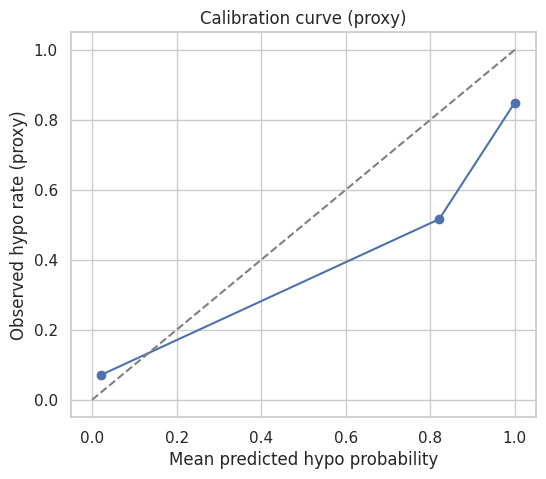

In [85]:
# Plot

#calibration curve

plt.figure(figsize=(6,5))
plt.plot(calib['mean_pred_prob'], calib['observed_rate'], marker='o')
plt.plot([0,1],[0,1], '--', color='gray')
plt.xlabel("Mean predicted hypo probability")
plt.ylabel("Observed hypo rate (proxy)")
plt.title("Calibration curve (proxy)")
plt.grid(True)
plt.show()

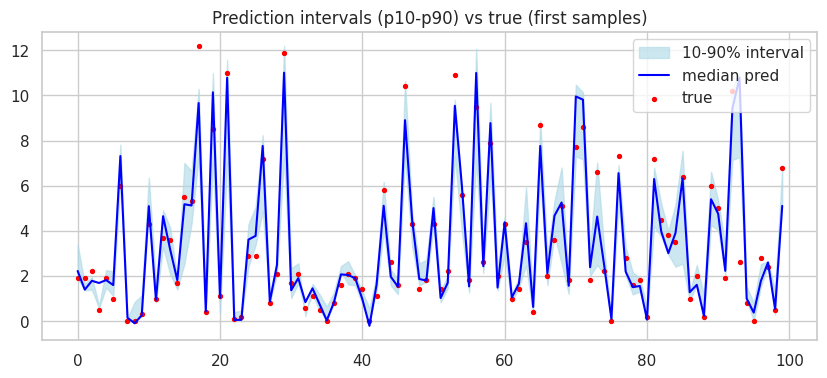

In [86]:
#Example prediction intervals vs true values (first 100 samples)

n_plot = min(100, len(pred_med))
plt.figure(figsize=(10,4))
x = np.arange(n_plot)
plt.fill_between(x, pred_low[:n_plot], pred_high[:n_plot], color='lightblue', alpha=0.6, label='10-90% interval')
plt.plot(x, pred_med[:n_plot], label='median pred', color='blue')
plt.scatter(x, yv[:n_plot], color='red', s=8, label='true')
plt.legend()
plt.title("Prediction intervals (p10-p90) vs true (first samples)")
plt.show()

Simulator integration

This simulator is a simple deterministic compartment model that:

Models carb absorption (mono-exponential Ra),

Models insulin action as a decaying effect from bolus + basal,

Integrates glucose differential equation with Euler method (dt in minutes).
It’s not UVa/Padova but useful for evaluation and development — swap with a real simulator later.

In [87]:
#Minimal glucose–insulin simulator

import numpy as np
import pandas as pd

def simulate_minimal_model(row, bolus_units, horizon_minutes=240, dt_min=5,
                           Vg=10.0,    # glucose distribution volume (L) - heuristic
                           SI=0.02,    # insulin sensitivity (mg/dL per U per unit action) - tune per patient
                           carb_abs_tau_min=None,  # carbs absorption time constant
                           DIA_hours=5.0):
    """
    Simulate glucose trajectory for a single timepoint row given a bolus insulin (units).
    Returns a DataFrame with columns ['t_min','glucose'] and summary metrics.
    - row: pd.Series (should contain glucose_level, carbs_g, weight_kg, median_ISF optionally)
    - bolus_units: units of insulin given at t=0
    Note: this is a simplified model for evaluation only.
    """
    # Initial / patient vars
    G0 = float(row.get('glucose_level', 120.0))        # mg/dL
    carbs = float(row.get('carbs_g', 0.0))             # grams
    weight = float(row.get('weight_kg', 70.0))
    # carb absorption time constant (minutes)
    if carb_abs_tau_min is None:
        # choose based on meal type or carb_duration if available
        if 'carb_duration_min' in row and not pd.isna(row['carb_duration_min']):
            carb_abs_tau_min = row['carb_duration_min'] / 2.0 + 20.0
        else:
            carb_abs_tau_min = 60.0
    # insulin action decay time constant (minutes) from DIA
    tau_ins = DIA_hours * 60.0 / 2.0  # simple mapping: tau ~ DIA/2 (tunable)

    # time grid
    times = np.arange(0, horizon_minutes + dt_min, dt_min)  # minutes
    n = len(times)

    # Initialize state variables
    G = np.zeros(n); G[0] = G0
    Ra = np.zeros(n)   # rate of appearance (mg/dL per min)
    Ieff = np.zeros(n) # insulin action (arbitrary units)
    # convert carbs (g) to mg/dL change: 1 g carbs ≈ 4 kcal -> approx glucose mg/dL change depends on Vg.
    # Use scaling: assume 1 g carbs raises blood glucose by approx 3 mg/dL / (Vg factor) — rough
    carb_to_gluc_factor = 3.0  # tweakable

    # Bolus generates initial Ieff impulse
    Ieff[0] = bolus_units

    # simulate with Euler integration
    for t_idx in range(1, n):
        # time step
        dt = dt_min

        # carbohydrate absorption: monoexponential Ra (grams -> glucose units)
        # Ra_g/min = carbs / tau * exp(-t/tau)
        t = times[t_idx]
        Ra_g = (carbs / max(1.0, carb_abs_tau_min)) * np.exp(-t / carb_abs_tau_min)  # g per min approx
        Ra_gluc = Ra_g * carb_to_gluc_factor  # convert to mg/dL per min (approx)
        Ra[t_idx] = Ra_gluc

        # insulin action decay (exponential)
        Ieff[t_idx] = Ieff[t_idx-1] * np.exp(-dt / tau_ins)

        # net glucose change: appearance - insulin-mediated uptake (proportional to Ieff*(G - 80))
        insulin_term = SI * Ieff[t_idx] * max(0, G[t_idx-1] - 80.0)  # uptake proportional to hyperglycemia
        dG = (Ra_gluc - insulin_term) * (dt / 1.0) / Vg  # simplified scaling
        # small basal drift towards 100 mg/dL
        basal_drift = 0.001 * (100.0 - G[t_idx-1]) * dt
        G[t_idx] = max(30.0, G[t_idx-1] + dG + basal_drift)

    sim_df = pd.DataFrame({'t_min': times, 'glucose': G, 'Ra': Ra, 'Ieff': Ieff})
    # summary metrics
    min_gluc = float(G.min())
    max_gluc = float(G.max())
    time_in_range = float(((G >= 70.0) & (G <= 180.0)).mean() * 100.0)
    hypo_episodes = int(((G < 70.0).astype(int)).sum())
    return {'sim_df': sim_df, 'min_gluc': min_gluc, 'max_gluc': max_gluc,
            'time_in_range_pct': time_in_range, 'hypo_counts': hypo_episodes}

In [88]:
# Apply simulator to validation set predictions

# Inputs expected: test_df (aligned with Xv), pred_med (median predictions array), optionally pred_low/pred_high

# Build test_df if not available:
test_df = model_df.loc[Xv.index].reset_index(drop=True).copy()  # ensures alignment

# We'll evaluate the median predictions pred_med
results_sim = []
for i in range(len(pred_med)):
    row = test_df.iloc[i]
    pred_bolus = float(pred_med[i])
    sim_res = simulate_minimal_model(row, bolus_units=pred_bolus, horizon_minutes=240, dt_min=5)
    # gather
    results_sim.append({
        'idx': i,
        'pred_bolus': pred_bolus,
        'true_bolus': float(row['recommended_bolus_units']),
        'min_gluc': sim_res['min_gluc'],
        'max_gluc': sim_res['max_gluc'],
        'time_in_range_pct': sim_res['time_in_range_pct'],
        'hypo_counts': sim_res['hypo_counts']
    })

sim_results_df = pd.DataFrame(results_sim)

In [89]:
# Summary statistics
print("Simulator-based summary (median predictions):")
print("Mean TIR%:", sim_results_df['time_in_range_pct'].mean())
print("Fraction with any hypo episodes:", (sim_results_df['hypo_counts'] > 0).mean())
print(sim_results_df.describe()[['min_gluc','time_in_range_pct','hypo_counts']])

Simulator-based summary (median predictions):
Mean TIR%: 83.23615160349853
Fraction with any hypo episodes: 0.0
         min_gluc  time_in_range_pct  hypo_counts
count  140.000000         140.000000        140.0
mean   120.739254          83.236152          0.0
std     33.288206          29.624636          0.0
min     70.300000           0.000000          0.0
25%     92.389330          82.653061          0.0
50%    112.428365         100.000000          0.0
75%    144.589059         100.000000          0.0
max    204.966998         100.000000          0.0


In [90]:
# Example: show some rows where hypo occurred
print("\nExample rows with hypo episodes (sim):")
display(sim_results_df[sim_results_df['hypo_counts']>0].head())


Example rows with hypo episodes (sim):


,idx,pred_bolus,true_bolus,min_gluc,max_gluc,time_in_range_pct,hypo_counts


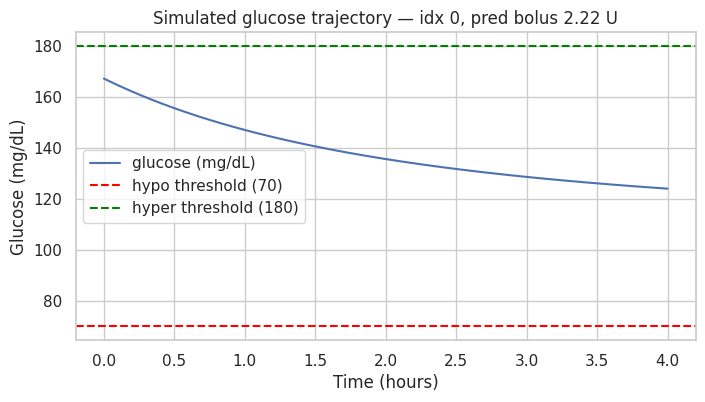

In [91]:
#Plot simulated glucose trajectory

import matplotlib.pyplot as plt

i_plot = 0  # change index as needed, must be < len(pred_med)
row = test_df.iloc[i_plot]
pred_bolus = float(pred_med[i_plot])
sim_res = simulate_minimal_model(row, bolus_units=pred_bolus, horizon_minutes=240, dt_min=5)
sim_df = sim_res['sim_df']

plt.figure(figsize=(8,4))
plt.plot(sim_df['t_min']/60.0, sim_df['glucose'], label='glucose (mg/dL)')
plt.axhline(70, color='red', linestyle='--', label='hypo threshold (70)')
plt.axhline(180, color='green', linestyle='--', label='hyper threshold (180)')
plt.xlabel('Time (hours)')
plt.ylabel('Glucose (mg/dL)')
plt.title(f"Simulated glucose trajectory — idx {i_plot}, pred bolus {pred_bolus:.2f} U")
plt.legend()
plt.show()

## 10. Final Predict

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

In [93]:
# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to float (important for XGBoost)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")

Training data: 560 samples
Testing data: 140 samples


In [94]:
# Train XGBoost model
model = XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.05, random_state=42)
model.fit(X_train.values, y_train.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [95]:
# Predictions on test data
y_pred = model.predict(X_test.values)

In [96]:
# Accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n===== Model Performance =====")
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Approx Accuracy: {100 - (mae / y_test.mean() * 100):.2f}%")


===== Model Performance =====
Train samples: 560, Test samples: 140
MAE: 0.583
RMSE: 1.070
Approx Accuracy: 82.77%


In [97]:
print(model_df.columns.tolist())

['glucose_level', 'adj_carbs_g', 'carb_rate_g_per_hr', 'sIOB', 'dIOB', 'time_sin', 'time_cos', 'age', 'weight_kg', 'bolus_per_kg', 'median_ICR', 'median_ISF', 'sum_bolus_last_4h', 'sum_bolus_last_6h', 'meal_type', 'meal_breakfast', 'meal_dinner', 'meal_lunch', 'meal_snack', 'recommended_bolus_units']


In [98]:
# Select important features (example: adjust as per your feature engineering)

important_features = [
    "glucose_level",       # current glucose
    "adj_carbs_g",         # adjusted carbs instead of carbs_g
    "carb_rate_g_per_hr",  # carb absorption rate
    "sIOB",                # static IOB instead of insulin_on_board
    "dIOB",                # dynamic IOB
    "weight_kg",
    "median_ICR",          # insulin-to-carb ratio
    "median_ISF",          # insulin sensitivity factor
    "meal_breakfast",      # one-hot encoded meal types
    "meal_lunch",
    "meal_dinner",
    "meal_snack"
]

In [99]:
# Drop duplicate columns (you had many repeated meal columns)

model_df = model_df.loc[:, ~model_df.columns.duplicated()]

In [100]:
# Select features & target
X = model_df[important_features]
y = model_df["recommended_bolus_units"]

In [101]:
# Example random input

import pandas as pd

sample_input = pd.DataFrame([{
    "glucose_level": 185,
    "adj_carbs_g": 55,
    "carb_rate_g_per_hr": 20,
    "sIOB": 1.5,
    "dIOB": 1.2,
    "weight_kg": 70,
    "median_ICR": 12,
    "median_ISF": 45,
    "meal_breakfast": 0,
    "meal_lunch": 1,
    "meal_dinner": 0,
    "meal_snack": 0
}])

In [102]:
# Make sure input matches feature order and dtype
sample_input = sample_input.reindex(columns=X_train.columns, fill_value=0).astype(float)

In [103]:
# Convert to numpy for XGBoost
predicted_dose = model.predict(sample_input.values)[0]

In [104]:
#Predict

print(f"\nPredicted Insulin Dose: {predicted_dose:.2f} units")


Predicted Insulin Dose: 6.67 units


## Building Pickle File

In [105]:
import joblib

# Save model + feature list together
final_package = {
    "model": model,
    "features": list(X_train.columns)  # save feature order for reindexing
}

joblib.dump(final_package, "insulin_predictor_final.pkl")

print(" Model saved as insulin_dose_predictor.pkl")

 Model saved as insulin_dose_predictor.pkl


In [106]:
# Load the package
pkg = joblib.load("insulin_predictor_final.pkl")

# Extract model and features
loaded_model = pkg["model"]
feature_list = pkg["features"]

# Align input with training features
sample_input = sample_input.reindex(columns=feature_list, fill_value=0).astype(float)

# Predict
predicted_dose = loaded_model.predict(sample_input.values)[0]
print(f"\nPredicted Insulin Dose: {predicted_dose:.2f} units (using loaded model)")


Predicted Insulin Dose: 6.67 units (using loaded model)
